In [1]:
#1. Read csv in python and store as list

import csv

t_sigA = [] # column 0
sigA = [] # column 1
t_sigB = [] # column 0
sigB = [] # column 1
t_sigC = [] # column 0
sigC = [] # column 1

def readCSV(filename):
    with open(filename) as f:
        col0 = []
        col1 = []
        # open the csv file
        reader = csv.reader(f)
        for row in reader:
            # read the rows 1 one by one
            col0.append(float(row[0])) # leftmost column
            col1.append(float(row[1])) # second column
    return col0, col1

t_sigA, sigA = readCSV('sigA.csv')
t_sigB, sigB = readCSV('sigB.csv')
t_sigC, sigC = readCSV('sigC.csv')
t_sigD, sigD = readCSV('sigD.csv')

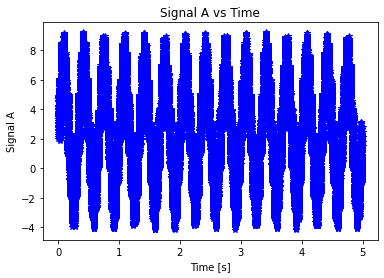

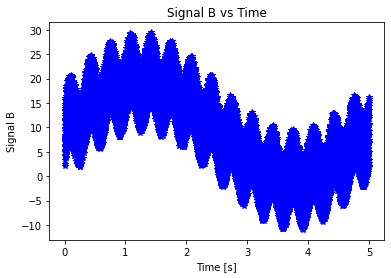

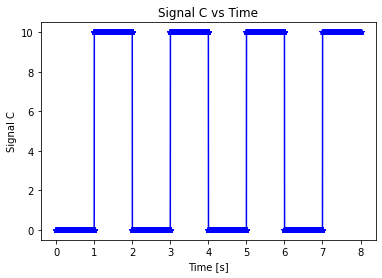

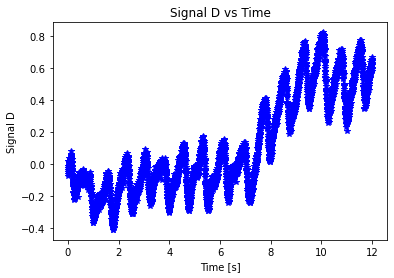

In [2]:
#2. Plot data in matplotlib

import matplotlib.pyplot as plt # for plotting

#plot signal A
plt.plot(t_sigA, sigA,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal A')
plt.title('Signal A vs Time')
plt.show()

#plot signal B
plt.plot(t_sigB, sigB,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal B')
plt.title('Signal B vs Time')
plt.show()

#plot signal C
plt.plot(t_sigC, sigC,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal C')
plt.title('Signal C vs Time')
plt.show()

#plot signal D
plt.plot(t_sigD, sigD,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal D')
plt.title('Signal D vs Time')
plt.show()

In [3]:
#3. Compute sample rate of signal
#sample rate = number of data points / total time of samples
samp_rate_sigA = len(sigA) / t_sigA[-1]
samp_rate_sigB = len(sigB) / t_sigB[-1]
samp_rate_sigC = len(sigC) / t_sigC[-1]
samp_rate_sigD = len(sigD) / t_sigC[-1]

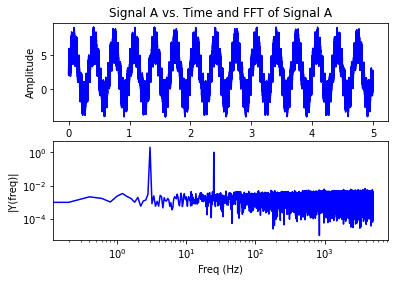

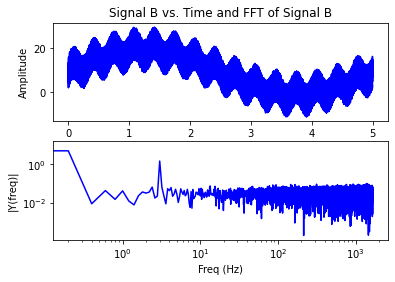

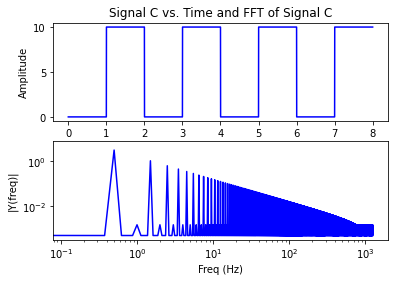

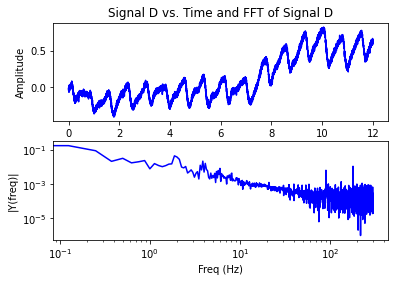

In [4]:
#4. Generate ffts for each csv

import matplotlib.pyplot as plt
import numpy as np

def generateFFT(t, y, Fs):
    Ts = 1.0/Fs; # sampling interval
    ts = np.arange(0,t[-1],Ts) # time vector
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    return frq, Y

frqA, Y_A = generateFFT(t_sigA, sigA, samp_rate_sigA)
frqB, Y_B = generateFFT(t_sigB, sigB, samp_rate_sigB)
frqC, Y_C = generateFFT(t_sigC, sigC, samp_rate_sigC)
frqD, Y_D = generateFFT(t_sigD, sigD, samp_rate_sigD)

#plot signal A
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t_sigA, sigA, 'b')
ax1.title.set_text('Signal A vs. Time and FFT of Signal A')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.loglog(frqA, abs(Y_A),'b') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal B
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t_sigB, sigB, 'b')
ax1.title.set_text('Signal B vs. Time and FFT of Signal B')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.loglog(frqB, abs(Y_B),'b') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal C
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t_sigC, sigC, 'b')
ax1.title.set_text('Signal C vs. Time and FFT of Signal C')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.loglog(frqC, abs(Y_C),'b') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal C
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t_sigD, sigD, 'b')
ax1.title.set_text('Signal D vs. Time and FFT of Signal D')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.loglog(frqD, abs(Y_D),'b') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

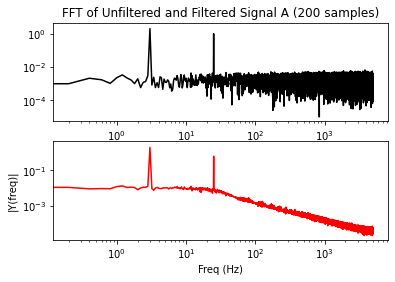

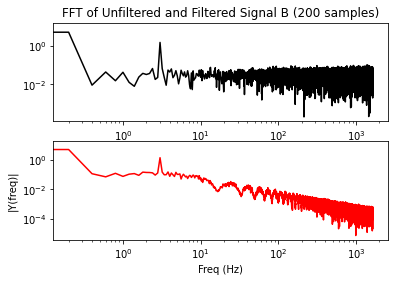

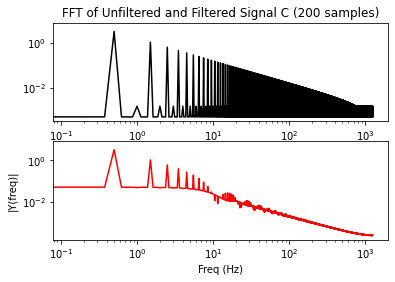

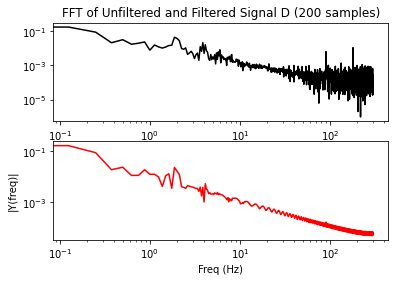

In [6]:
#5. Moving average filter
sigA_avg = []
sigB_avg = []
sigC_avg = []

samples = 200

def MAF(x, samples):
    y = []
    for i in range(samples,len(x)):
        avg = 0
        for j in range(samples + 1):
            avg = avg + x[i - j]
        y.append(avg / (samples + 1))
    return y
    
sigA_avg = MAF(sigA, samples)
sigB_avg = MAF(sigB, samples)
sigC_avg = MAF(sigC, samples)
sigD_avg = MAF(sigD, samples)

#take FFTs and compare avg filter to raw data
frqA, Y_A = generateFFT(t_sigA, sigA, samp_rate_sigA)
frqAF, Y_AF = generateFFT(t_sigA, np.zeros(samples).tolist() + sigA_avg, samp_rate_sigA)
frqB, Y_B = generateFFT(t_sigB, sigB, samp_rate_sigB)
frqBF, Y_BF = generateFFT(t_sigB, np.zeros(samples).tolist() + sigB_avg, samp_rate_sigB)
frqC, Y_C = generateFFT(t_sigC, sigC, samp_rate_sigC)
frqCF, Y_CF = generateFFT(t_sigC, np.zeros(samples).tolist() + sigC_avg, samp_rate_sigC)
frqD, Y_D = generateFFT(t_sigD, sigD, samp_rate_sigD)
frqDF, Y_DF = generateFFT(t_sigD, np.zeros(samples).tolist() + sigD_avg, samp_rate_sigD)

#plot signal A
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqA, abs(Y_A),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal A (200 samples)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqAF, abs(Y_AF),'r') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal B
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqB, abs(Y_B),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal B (200 samples)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqBF, abs(Y_BF),'r') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal C
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqC, abs(Y_C),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal C (200 samples)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqCF, abs(Y_CF),'r') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal D
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqD, abs(Y_D),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal D (200 samples)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqDF, abs(Y_DF),'r') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

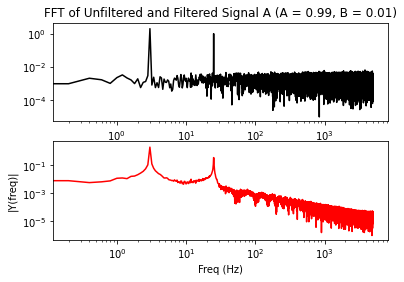

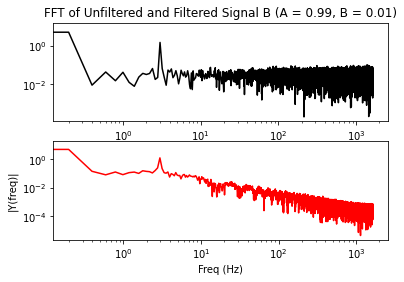

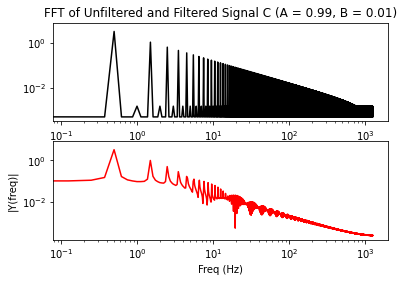

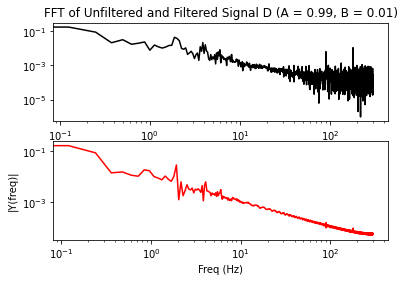

In [7]:
#6. IIR filter
#new_average = A * previous_value + B * new_value
A = 0.99
B = 1 - A

sigA_IIR = []
sigB_IIR = []
sigC_IIR = []

def IIR(x, A, B):
    y = []
    prev_val = x[0]
    for i in range(1, len(x) - 1):
        prev_val = A * prev_val + B * x[i]
        y.append(prev_val)
    return y

sigA_IIR = IIR(sigA, A, B)
sigB_IIR = IIR(sigB, A, B)
sigC_IIR = IIR(sigC, A, B)
sigD_IIR = IIR(sigD, A, B)

frqA, Y_A = generateFFT(t_sigA, sigA, samp_rate_sigA)
frqAF, Y_AF = generateFFT(t_sigA, np.zeros(samples).tolist() + sigA_IIR, samp_rate_sigA)
frqB, Y_B = generateFFT(t_sigB, sigB, samp_rate_sigB)
frqBF, Y_BF = generateFFT(t_sigB, np.zeros(samples).tolist() + sigB_IIR, samp_rate_sigB)
frqC, Y_C = generateFFT(t_sigC, sigC, samp_rate_sigC)
frqCF, Y_CF = generateFFT(t_sigC, np.zeros(samples).tolist() + sigC_IIR, samp_rate_sigC)
frqD, Y_D = generateFFT(t_sigD, sigD, samp_rate_sigD)
frqDF, Y_DF = generateFFT(t_sigD, np.zeros(samples).tolist() + sigD_IIR, samp_rate_sigD)

#plot signal A
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqA, abs(Y_A),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal A (A = 0.99, B = 0.01)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqAF, abs(Y_AF),'r') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal B
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqB, abs(Y_B),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal B (A = 0.99, B = 0.01)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqBF, abs(Y_BF),'red') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal C
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqC, abs(Y_C),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal C (A = 0.99, B = 0.01)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqCF, abs(Y_CF),'red') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal D
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqD, abs(Y_D),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal D (A = 0.99, B = 0.01)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqDF, abs(Y_DF),'red') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

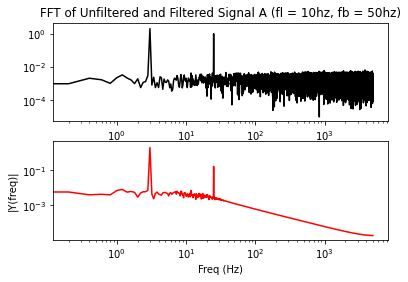

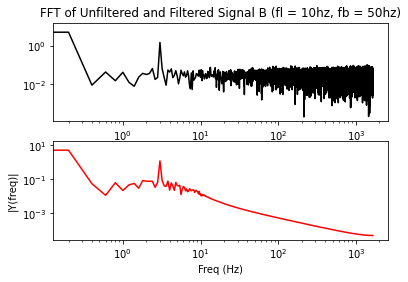

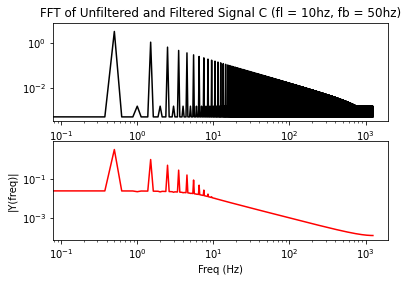

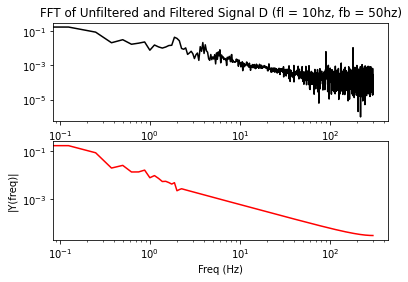

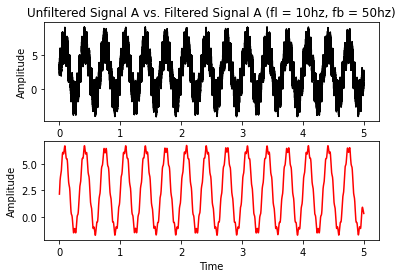

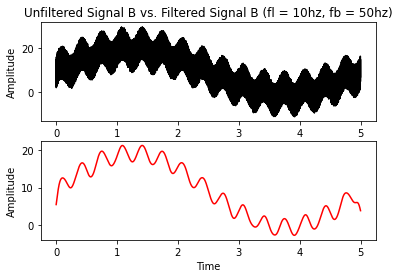

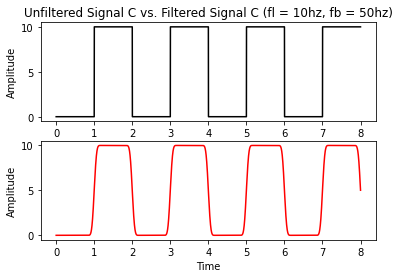

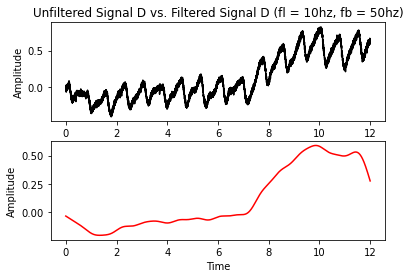

In [8]:
#7. Filtering using generated coefficients

#lpf filter parameters
cutoff_A = 10
bandwidth_A = 50

#Here I am using the code from fiir.com to generate the coefficients so I don't need to copy them manually
def getFilter(cutoff, bandwidth, samplerate):
    fc = cutoff/samplerate  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
    b = bandwidth/samplerate  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1  # Make sure that N is odd.
    n = np.arange(N)
 
    # Compute sinc filter.
    h = np.sinc(2 * fc * (n - (N - 1) / 2))
 
    # Compute Blackman window.
    w = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + \
        0.08 * np.cos(4 * np.pi * n / (N - 1))
 
    # Multiply sinc filter by window.
    h = h * w
 
    # Normalize to get unity gain.
    h = h / np.sum(h)
    return h
    
filterA = getFilter(cutoff_A, bandwidth_A, samp_rate_sigA)

sigA_sinc = np.convolve(sigA,filterA, 'same')
sigB_sinc = np.convolve(sigB,filterA, 'same')
sigC_sinc = np.convolve(sigC,filterA, 'same')
sigD_sinc = np.convolve(sigD,filterA, 'same')

frqA, Y_A = generateFFT(t_sigA, sigA, samp_rate_sigA)
frqAF, Y_AF = generateFFT(t_sigA,  sigA_sinc, samp_rate_sigA)
frqB, Y_B = generateFFT(t_sigB, sigB, samp_rate_sigB)
frqBF, Y_BF = generateFFT(t_sigB, sigB_sinc, samp_rate_sigB)
frqC, Y_C = generateFFT(t_sigC, sigC, samp_rate_sigC)
frqCF, Y_CF = generateFFT(t_sigC, sigC_sinc, samp_rate_sigC)
frqD, Y_D = generateFFT(t_sigD, sigD, samp_rate_sigD)
frqDF, Y_DF = generateFFT(t_sigD, sigD_sinc, samp_rate_sigD)

#plot signal A FFTs
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqA, abs(Y_A),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal A (fl = 10hz, fb = 50hz)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqAF, abs(Y_AF),'r') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal B FFTs
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqB, abs(Y_B),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal B (fl = 10hz, fb = 50hz)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqBF, abs(Y_BF),'red') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal C FFTs
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqC, abs(Y_C),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal C (fl = 10hz, fb = 50hz)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqCF, abs(Y_CF),'red') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal D FFTs
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.loglog(frqD, abs(Y_D),'black') # plotting the fft
ax1.title.set_text('FFT of Unfiltered and Filtered Signal D (fl = 10hz, fb = 50hz)')
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.loglog(frqDF, abs(Y_DF),'red') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()

#plot signal A time domain
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t_sigA, sigA, 'black')
ax1.title.set_text('Unfiltered Signal A vs. Filtered Signal A (fl = 10hz, fb = 50hz)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.plot(t_sigA, sigA_sinc, 'red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')
plt.show()

#plot signal B time domain
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t_sigB, sigB, 'black')
ax1.title.set_text('Unfiltered Signal B vs. Filtered Signal B (fl = 10hz, fb = 50hz)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.plot(t_sigB, sigB_sinc, 'red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')
plt.show()

#plot signal C time domain
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t_sigC, sigC, 'black')
ax1.title.set_text('Unfiltered Signal C vs. Filtered Signal C (fl = 10hz, fb = 50hz)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.plot(t_sigC, sigC_sinc, 'red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')
plt.show()

#plot signal D time domain
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t_sigD, sigD, 'black')
ax1.title.set_text('Unfiltered Signal D vs. Filtered Signal D (fl = 10hz, fb = 50hz)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.plot(t_sigD, sigD_sinc, 'red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')
plt.show()

50000